In [367]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

[0.08220311 0.18682337 0.47018283 0.00747436 0.14889697 0.06009545
 0.19530585 0.4874618  0.01502532 0.19455235]


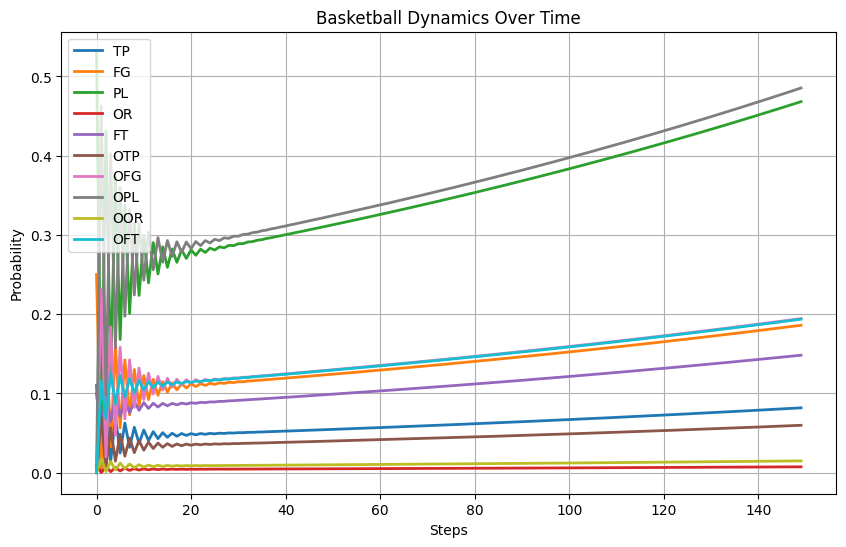

In [368]:
# Simulating a basketball game

# Three pointer, field goal, pocession lost, free throw, opponent three, opponent field goal, 
# opponenent pocession lost, opponent offensive rebound, opponent free throw
states = ["TP", "FG", "PL", "OR", "FT", "OTP", "OFG", "OPL", "OOR", "OFT"]
probabilities = np.array([0.11, 0.25, 0.53, 0.01, 0.1, 0, 0, 0, 0, 0])  


transition_matrix = np.array([
    # TP    FG    PL    OR    FT   OTP  OFG  OPL  OOR  OFT
    [0,  0,  0,  0, 0.0001, 0.08, 0.26, 0.5199, 0.02, 0.13],  # TP
    [0,  0,  0,  0, 0.0001, 0.08, 0.26, 0.5199, 0.02, 0.13],  # FG
    [0,  0,  0,  0,  0, 0.08, 0.26, 0.52, 0.02, 0.13],  # PL
    [0.11, 0.25, 0.53, 0.01, 0.1, 0, 0, 0, 0, 0],  # OR
    [0.00001, 0.00001, 0.5, 0.00001, 0.49997, 0, 0, 0, 0, 0],  # FT 
    [0.11, 0.25, 0.5299, 0.01, 0.1, 0, 0, 0, 0, 0.0001], # OTP
    [0.11, 0.25, 0.5299, 0.01, 0.1, 0, 0, 0, 0, 0.0001], # OFG
    [0.11, 0.25, 0.53, 0.01, 0.1, 0, 0, 0, 0, 0], # OPL
    [0,  0,  0,  0, 0, 0.08, 0.26, 0.52, 0.02, 0.13], # OOR
    [0, 0, 0, 0, 0, 0.00001, 0.00001, 0.5, 0.00001, 0.49997] # OFT
])

# Evolving over time 
steps = 150
history = np.zeros((steps, len(states)))

for i in range(steps): 
    history[i] = probabilities
    probabilities = probabilities @ transition_matrix

print(probabilities)
plt.figure(figsize=(10, 6))
for i, state in enumerate(states):
    plt.plot(range(steps), history[:, i], label=state, linewidth=2)

plt.xlabel("Steps")
plt.ylabel("Probability")
plt.title("Basketball Dynamics Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [369]:

# Warriors Expected Points
score_vector = np.array([3, 2, 0, 0, 1, 0, 0, 0, 0, 0])
w_expected_points_per_step = np.dot(probabilities, score_vector)

# Rockets Expected Points 
score_vector = np.array([0, 0, 0, 0, 0, 3, 2, 0, 0, 1])
r_expected_points_per_step = np.dot(probabilities, score_vector)


# Final expected score difference
w_expected_final_score = w_expected_points_per_step * steps
r_expected_final_score = r_expected_points_per_step * steps

print(f"Expected Final Score Difference (Warriors vs Rockets): {w_expected_final_score:.2f} - {r_expected_final_score:.2f}")



Expected Final Score Difference (Warriors vs Rockets): 115.37 - 114.82


In [370]:
def simulate_basketball_game(num_plays, 
                             prob_team_a_2, prob_team_a_3, prob_team_a_1,
                             prob_team_b_2, prob_team_b_3, prob_team_b_1):
    """Simulates a basketball game tracking actual scores and point types.

    Args:
        num_plays: Number of plays (scoring opportunities).
        prob_team_a_2: Probability of Team A scoring 2 points.
        prob_team_a_3: Probability of Team A scoring 3 points.
        prob_team_b_2: Probability of Team B scoring 2 points.
        prob_team_b_3: Probability of Team B scoring 3 points.

    Returns:
        A list of tuples (team_a_score, team_b_score) after each play.
    """
    prob_team_a_total = prob_team_a_2 + prob_team_a_3 + prob_team_a_1
    prob_team_b_total = prob_team_b_2 + prob_team_b_3 + prob_team_b_1

   
    # The remaining probability is "no score"
    prob_team_a = [1 - prob_team_a_total, prob_team_a_2, prob_team_a_3, prob_team_a_1]
    prob_team_b = [1 - prob_team_b_total, prob_team_b_2, prob_team_b_3, prob_team_b_1]

    team_a_score = 0
    team_b_score = 0
    score_history = [(team_a_score, team_b_score)]

    for _ in range(num_plays):
        # Randomly choose which team attempts the play
        scoring_team = random.choice(['A', 'B'])

        if scoring_team == 'A':
            points = random.choices([0, 2, 3, 1], weights=prob_team_a)[0]
            team_a_score += points
        else:
            points = random.choices([0, 2, 3, 1], weights=prob_team_b)[0]
            team_b_score += points

        score_history.append((team_a_score, team_b_score))

    return score_history


Team A wins series
Team A Wins: 4 | Team B Wins: 1


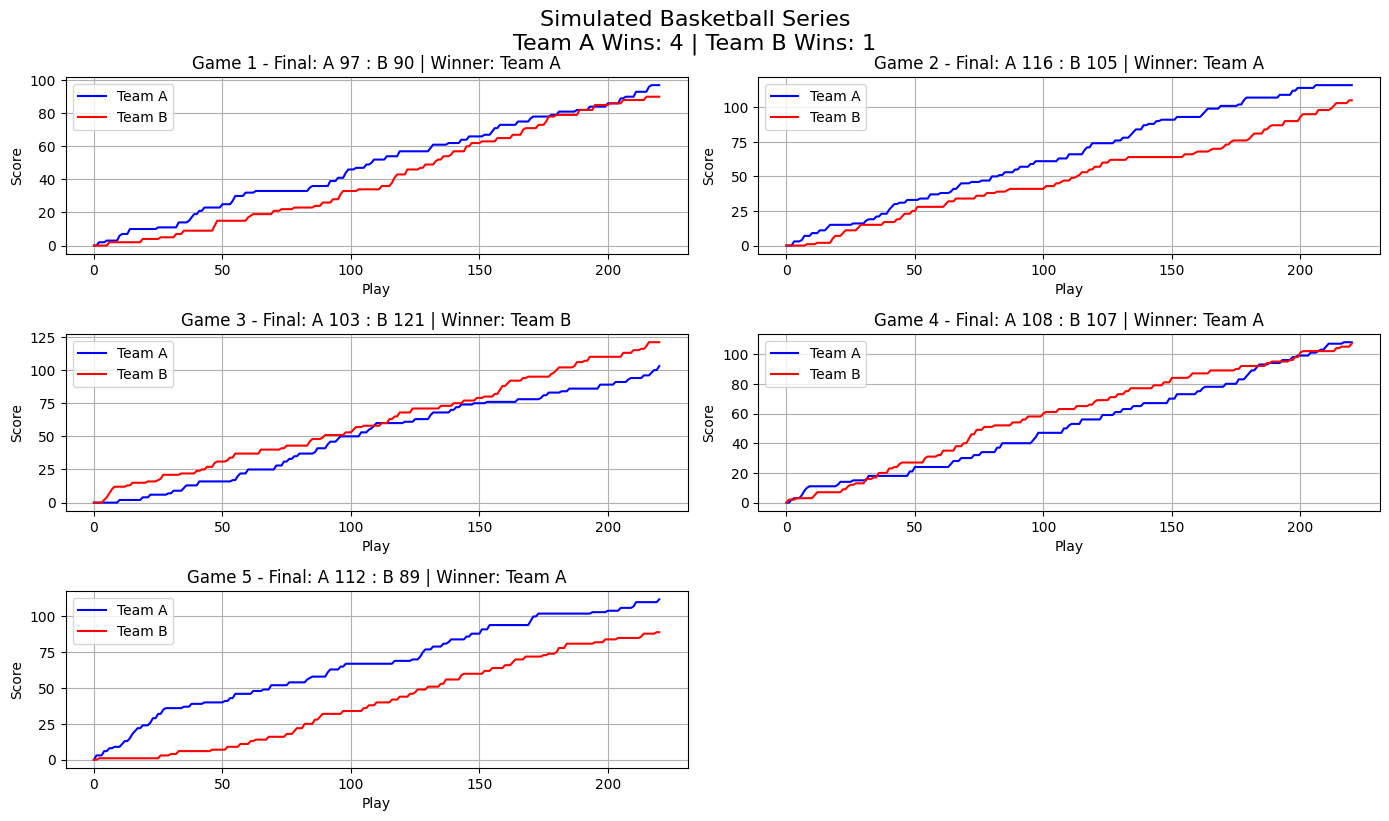

In [371]:
# Game parameters
num_steps = 220
num_games = 7


#Warriors
prob_team_a_2=0.25
prob_team_a_3=0.11
prob_team_a_1=0.1

#Rockets
prob_team_b_2=0.26
prob_team_b_3=0.08
prob_team_b_1=0.13

team_a_wins = 0
team_b_wins = 0

plt.figure(figsize=(14, 10))

for i in range(num_games):
    walk_data = simulate_basketball_game(num_steps, prob_team_a_2, prob_team_a_3, prob_team_a_1,
                                        prob_team_b_2, prob_team_b_3, prob_team_b_1)
    
    team_a_scores = [score[0] for score in walk_data]
    team_b_scores = [score[1] for score in walk_data]

    final_a = team_a_scores[-1]
    final_b = team_b_scores[-1]
    
    winner = "A" if final_a > final_b else "B" if final_b > final_a else "Tie"
    
    if winner == "A":
        team_a_wins += 1
    elif winner == "B":
        team_b_wins += 1
    elif winner == "Tie":
        if random.random() >= 0.5:
            team_a_wins += 1
        else:
            team_b_wins += 1
        

    # Plot each game
    plt.subplot(4, 2, i + 1)
    plt.plot(team_a_scores, label="Team A", color='blue')
    plt.plot(team_b_scores, label="Team B", color='red')
    plt.title(f"Game {i + 1} - Final: A {final_a} : B {final_b} | Winner: Team {winner}")
    plt.xlabel("Play")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    
    if team_a_wins == 4:
        print("Team A wins series")
        print(f"Team A Wins: {team_a_wins} | Team B Wins: {team_b_wins}")
        break
    elif team_b_wins == 4:
        print("Team B wins series")
        print(f"Team A Wins: {team_a_wins} | Team B Wins: {team_b_wins}")
        break

# Add series summary title
plt.tight_layout()
plt.suptitle(f"Simulated Basketball Series\nTeam A Wins: {team_a_wins} | Team B Wins: {team_b_wins}", 
            fontsize=16, y=1.03)
plt.show()



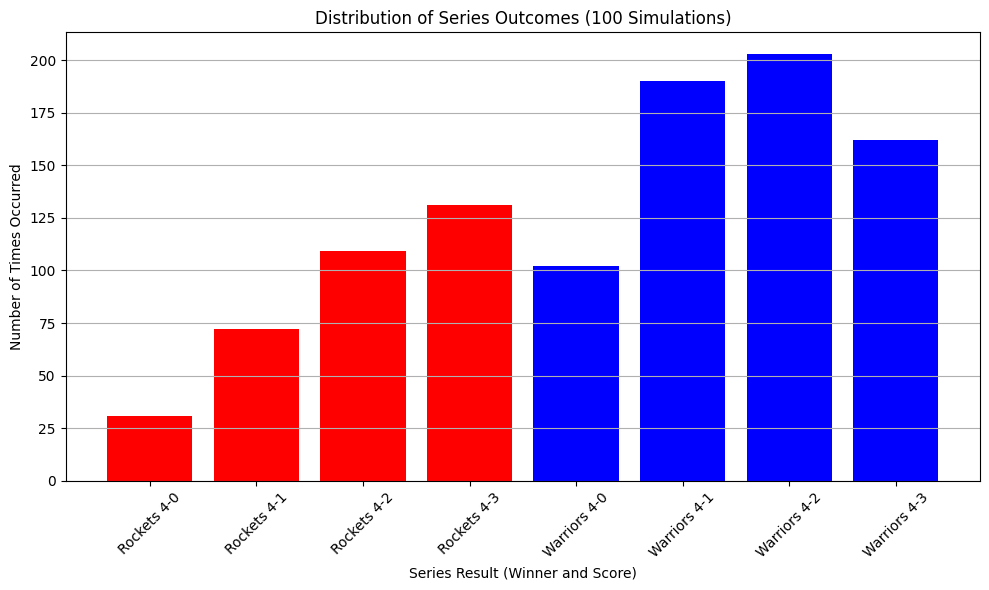

In [372]:
# Game settings
num_steps = 220
num_simulations = 1000

# Warriors
prob_team_a_2 = 0.25
prob_team_a_3 = 0.11
prob_team_a_1 = 0.10

# Rockets
prob_team_b_2 = 0.26
prob_team_b_3 = 0.08
prob_team_b_1 = 0.13

# Store series results
series_results = []

for _ in range(num_simulations):
    team_a_wins = 0
    team_b_wins = 0

    for _ in range(7):
        walk_data = simulate_basketball_game(num_steps, prob_team_a_2, prob_team_a_3, prob_team_a_1,
                                             prob_team_b_2, prob_team_b_3, prob_team_b_1)

        team_a_score = walk_data[-1][0]
        team_b_score = walk_data[-1][1]

        if team_a_score > team_b_score:
            team_a_wins += 1
        elif team_b_score > team_a_score:
            team_b_wins += 1
        else:
            # Resolve tie randomly
            if random.random() >= 0.5:
                team_a_wins += 1
            else:
                team_b_wins += 1

        if team_a_wins == 4 or team_b_wins == 4:
            break

    result = f"{team_a_wins}-{team_b_wins}" if team_a_wins == 4 else f"{team_b_wins}-{team_a_wins}"
    winner = "Warriors" if team_a_wins == 4 else "Rockets"
    series_results.append(f"{winner} {result}")

# Count occurrences
series_counter = Counter(series_results)

# Plotting
labels, counts = zip(*sorted(series_counter.items()))
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue' if 'Warriors' in lbl else 'red' for lbl in labels])
plt.xlabel("Series Result (Winner and Score)")
plt.ylabel("Number of Times Occurred")
plt.title("Distribution of Series Outcomes (100 Simulations)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
